<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/Task_PI_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK: Forecasting bus demand in Banana Republic municipalities.

The central urban planning commitee of Banana Republic asked you to help them with the forecast of bus demands of municipalities. And they provide a nice dataset to support you (https://pi.works/3w8IJbV). 
The dataset includes two measurements for an hour for the number of used buses in each municipality, each measurement is timestamped. The dataset format is as follows (comma separated values):
MUNICIPALITY_ID, TIMESTAMP, USAGE, TOTAL_CAPACITY
where municipality_id is an anonymization to disguise the actual names, timestamp represents the exact time of the measurement, usage is the number of buses in use at the time of measurement and total_capacity represents the total number of buses in the municipality. There are 10 municipalities (ids from 0 to 9), and two measurements for an hour.
The committee asks you to forecast the hourly bus usages for next week for each municipality. Hence you can aggregate the two measurements for an hour by taking the max value (sum would not be a nice idea for the obvious reasons) for each hour, and you should model this data with a time series model of your selection. (It would be a nice idea to implement a very simple baseline model first, and then try to improve the accuracy by introducing more complex methods eventually. The bare minimum requirement of the task is one simple baseline and one complex method.)
The committee says that they will use the last two weeks (starting from 2017-08-05 to 2017-08-19) as assessment (test) data, hence your code should report the error (in the criterion you chose for the task) for the last two weeks. You may use true values for the prediction of the last week of test data, then combine the error of the first and last week of the test separately.
Keep in mind that the dataset has missing data, hence a suitable missing data interpolation would be useful.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('/content/municipality_bus_utilization.csv')

In [3]:
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [4]:
df.shape

(13070, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
municipality_id,13070.000,4.500,2.872,0.000,2.000,4.500,7.000,9.000
usage,13070.000,876.003,679.287,11.000,403.000,692.000,1190.000,3508.000
total_capacity,13070.000,1972.800,1144.075,397.000,697.000,1974.500,2947.000,3893.000


In [8]:
df.timestamp.value_counts()

2017-06-04 07:59:42    10
2017-07-22 15:31:37    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
2017-07-23 14:30:43    10
                       ..
2017-08-19 16:30:35    10
2017-06-16 14:34:14     9
2017-08-11 08:25:43     9
2017-06-16 14:27:13     1
2017-08-11 08:19:39     1
Name: timestamp, Length: 1309, dtype: int64

In [9]:
df.timestamp.max()

'2017-08-19 16:30:35'

In [10]:
df.timestamp.min()

'2017-06-04 07:59:42'

In [12]:
df.municipality_id.value_counts()

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [13]:
df.usage.value_counts()

411     69
354     62
399     31
410     28
623     27
        ..
2830     1
2783     1
2664     1
2463     1
1680     1
Name: usage, Length: 2346, dtype: int64

In [14]:
df.total_capacity.value_counts()

1332    1307
2947    1307
3893    1307
2813    1307
2019    1307
587     1307
697     1307
397     1307
3113    1307
1930    1307
Name: total_capacity, dtype: int64

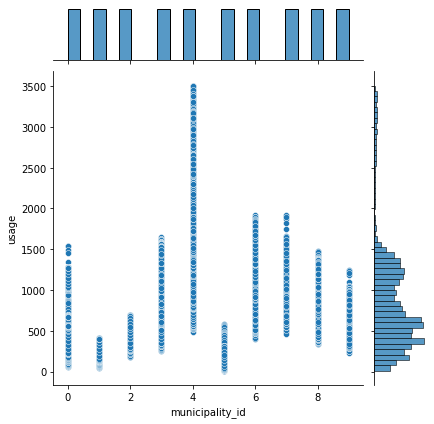

In [15]:
sns.jointplot(df['municipality_id'], df['usage'])

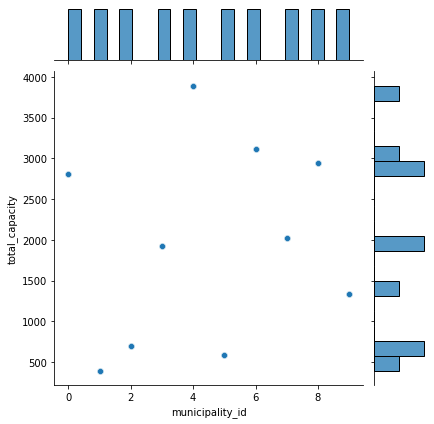

In [16]:
sns.jointplot(df['municipality_id'], df['total_capacity'])

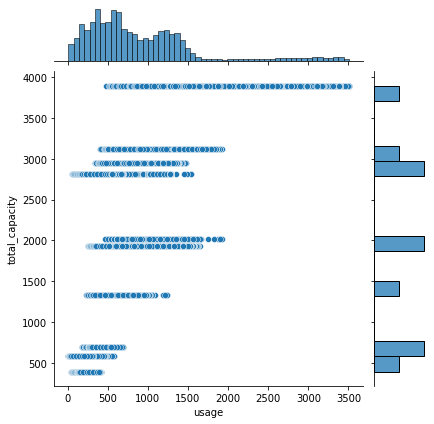

In [17]:
sns.jointplot(df['usage'], df['total_capacity'])

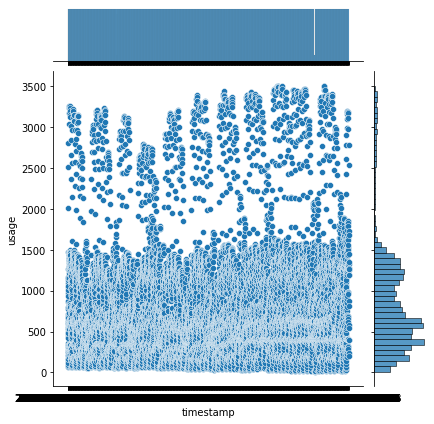

In [18]:
sns.jointplot(df['timestamp'], df['usage'])

In [20]:
df.corr()

,municipality_id,usage,total_capacity
municipality_id,1.000,0.184,0.173
usage,0.184,1.000,0.683
total_capacity,0.173,0.683,1.000


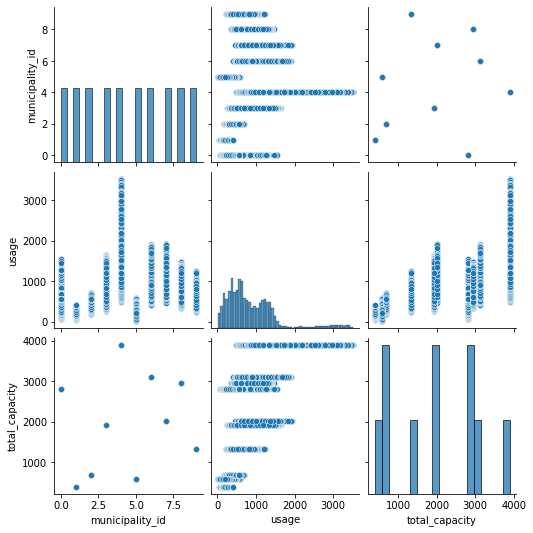

In [21]:
sns.pairplot(df)